In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
cd/content/drive/Shareddrives/MobileNetV2

/content/drive/Shareddrives/MobileNetV2


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model

In [ ]:
# Define input image size and batch size
IMG_SIZE = 260
BATCH_SIZE = 32

In [ ]:
# Define training and validation data directories
TRAIN_DIR = '/content/drive/Shareddrives/MobileNetV2/Dataset_withval/train'
VAL_DIR = '/content/drive/Shareddrives/MobileNetV2/Dataset_withval/validation'

In [ ]:
# Define data augmentation parameters
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Create data generators
train_generator = train_datagen.flow_from_directory(TRAIN_DIR,
                                                    target_size=(IMG_SIZE, IMG_SIZE),
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='categorical')
val_generator = val_datagen.flow_from_directory(VAL_DIR,
                                                target_size=(IMG_SIZE, IMG_SIZE),
                                                batch_size=BATCH_SIZE,
                                                class_mode='categorical')

Found 840 images belonging to 2 classes.
Found 180 images belonging to 2 classes.


In [ ]:
# Create EfficientNet-B0 model
model = tf.keras.applications.EfficientNetB2(weights='imagenet',
                                             include_top=False,
                                             input_shape=(IMG_SIZE, IMG_SIZE, 3))

31790344/31790344 [==============================] - 0s 0us/step


In [ ]:
# Add new output layers
x = model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
predictions = tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')(x)

In [ ]:
# Define final model
model_final = tf.keras.models.Model(inputs=model.input, outputs=predictions)

In [ ]:
# Compile model
optimizer = Adam(lr=0.001)
model_final.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "efficientnetb2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 260, 260, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 260, 260, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 260, 260, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Rescaling)        (None, 260, 260, 3)  0           ['normalization[0][0

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.871718 to fit



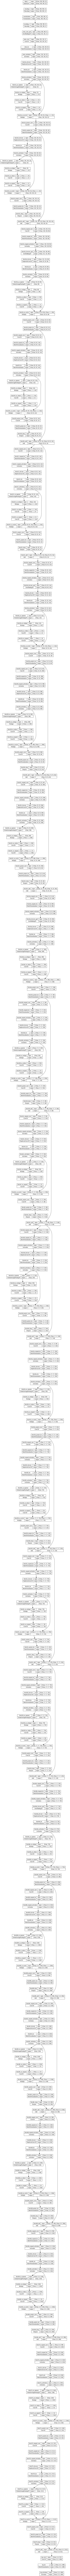

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 17.3 MB/s eta 0:00:00


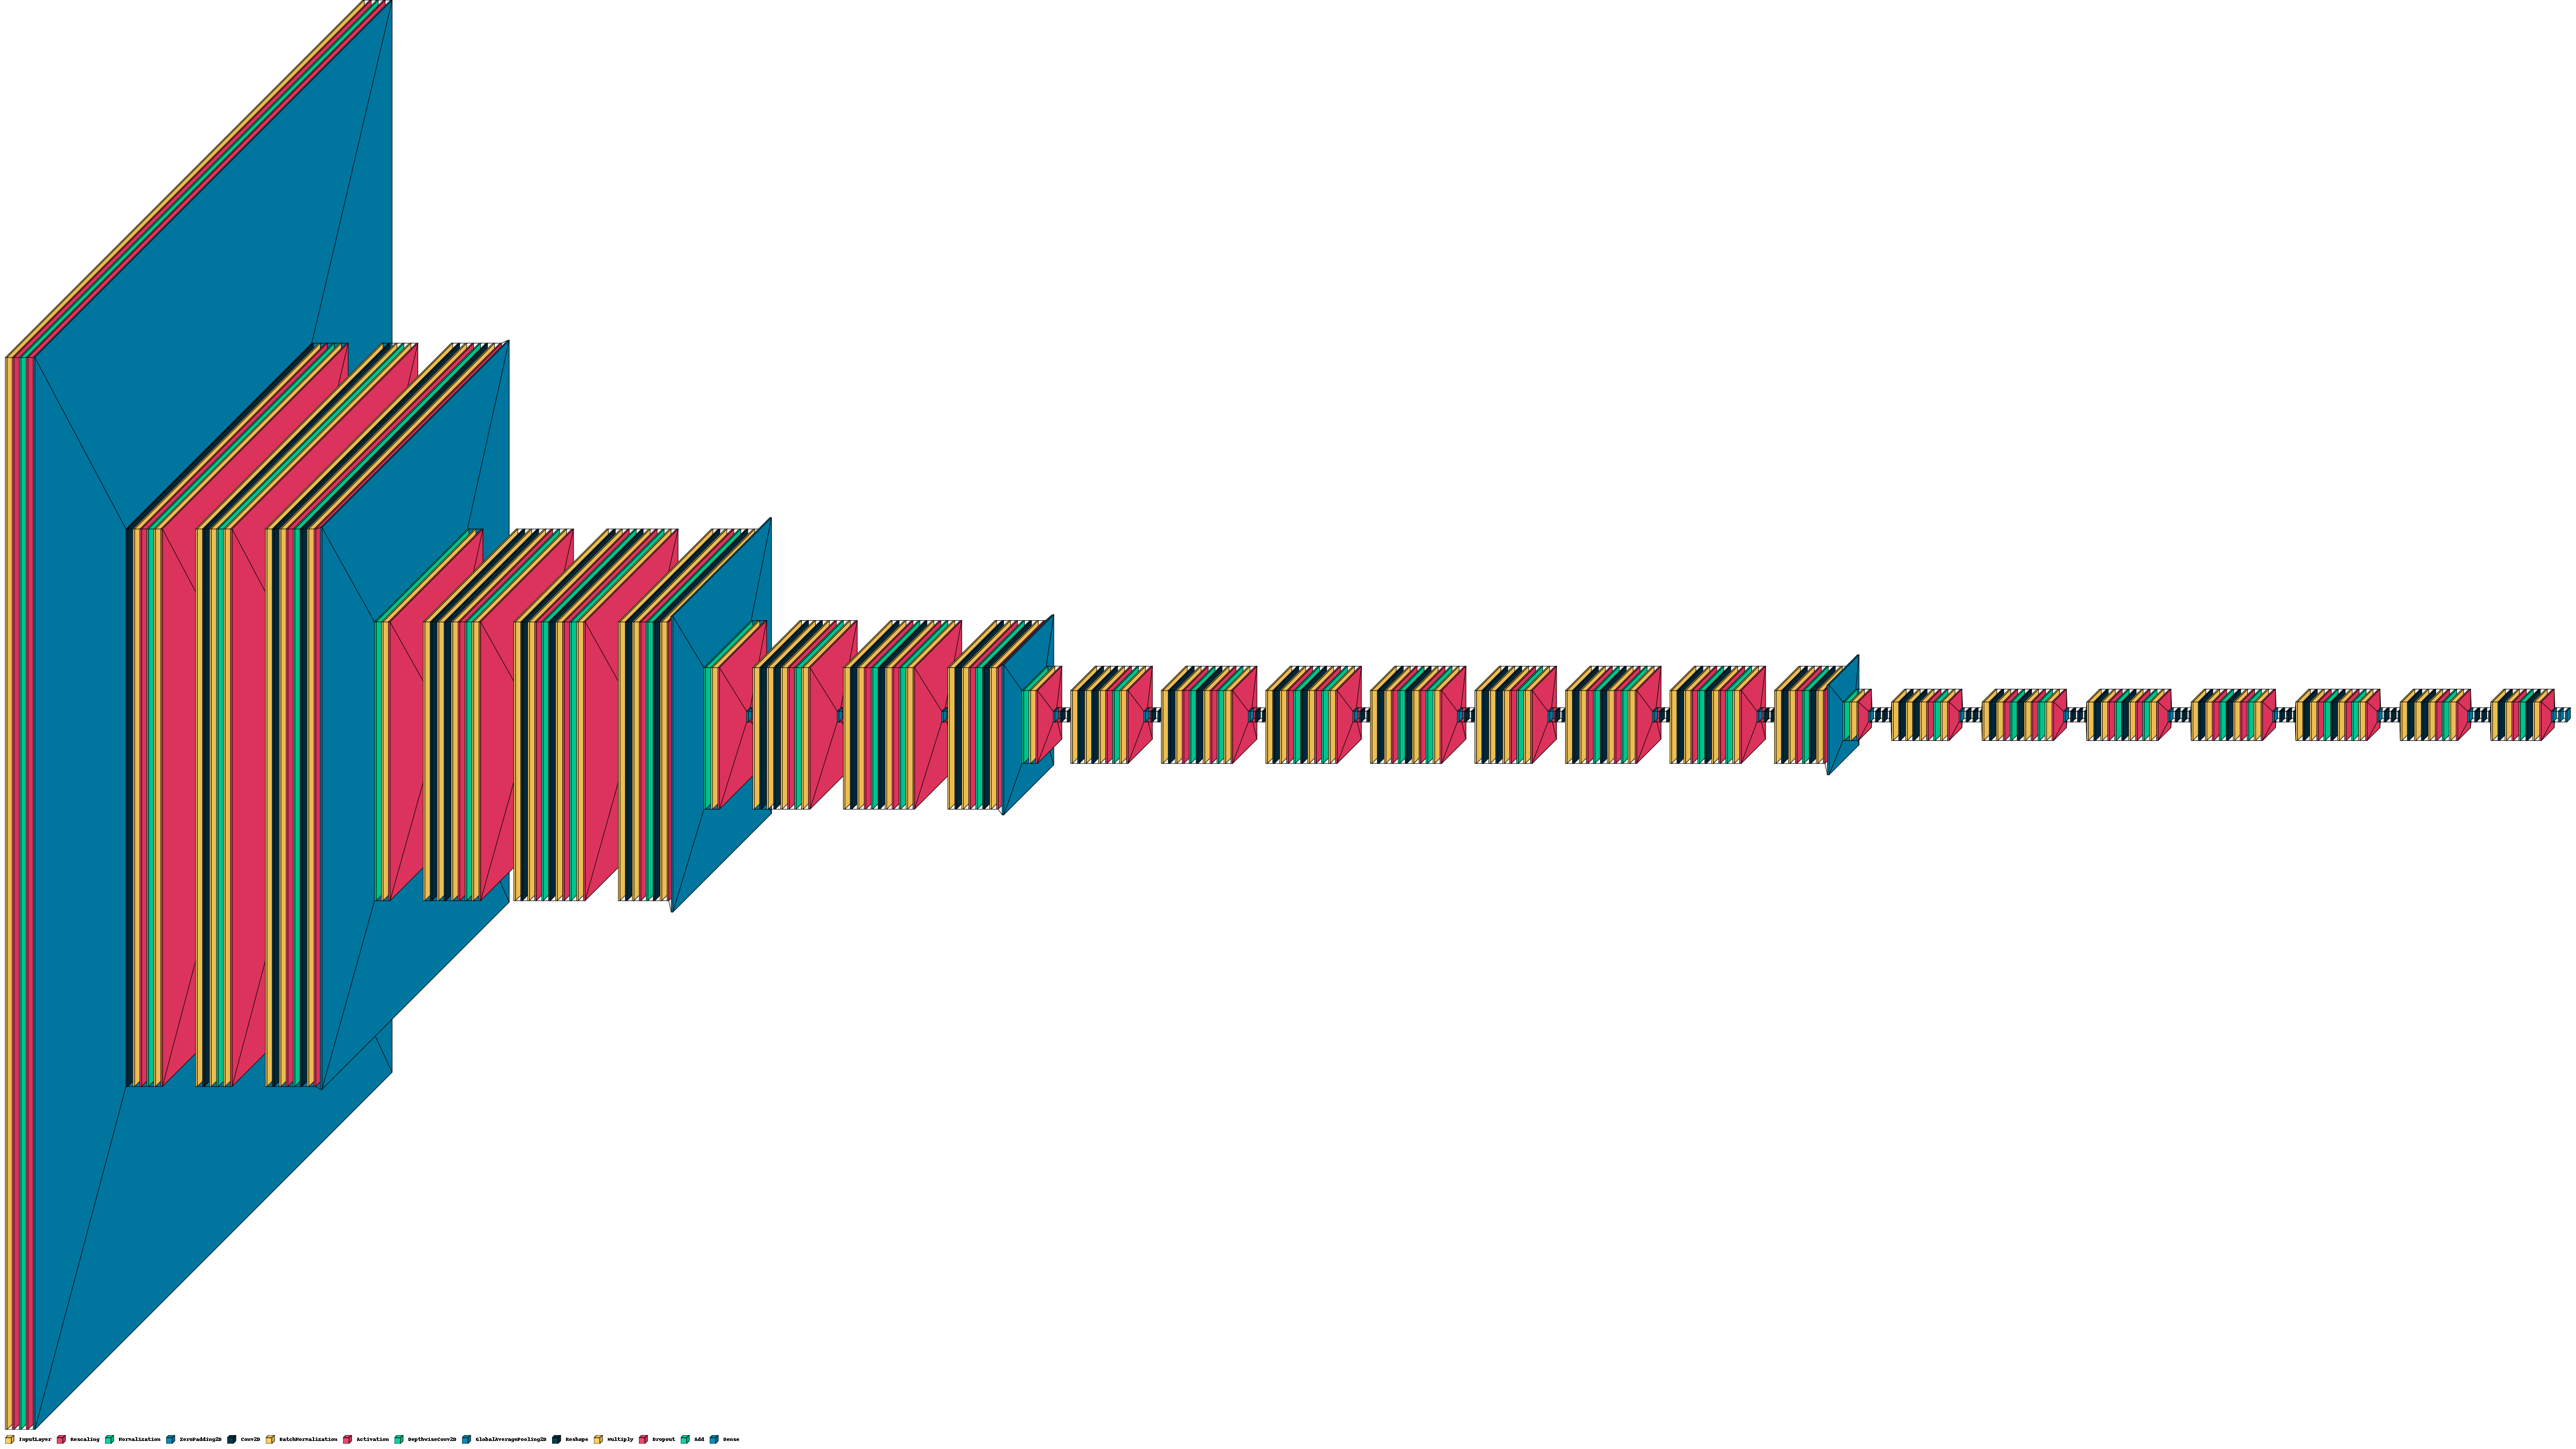

In [ ]:
model1=model_final
import visualkeras
from PIL import ImageFont
visualkeras.layered_view(model1, scale_xy=8, scale_z=3, max_z=3, legend=True)
#visualkeras.layered_view(model1, legend=True)

In [ ]:
# Define model checkpoint callback
checkpoint_path = "efficientnetb2_model_checkpoint.h5"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [ ]:
# Train model
epochs = 10
history = model_final.fit(train_generator, epochs=epochs, validation_data=val_generator, callbacks=[checkpoint])

Epoch 1/10
27/27 [==============================] - ETA: 0s - loss: 0.2184 - accuracy: 0.9250
Epoch 1: val_accuracy did not improve from 0.50000
27/27 [==============================] - 86s 3s/step - loss: 0.2184 - accuracy: 0.9250 - val_loss: 2.2383 - val_accuracy: 0.5000
Epoch 2/10
27/27 [==============================] - ETA: 0s - loss: 0.1688 - accuracy: 0.9488
Epoch 2: val_accuracy did not improve from 0.50000
27/27 [==============================] - 82s 3s/step - loss: 0.1688 - accuracy: 0.9488 - val_loss: 1.7997 - val_accuracy: 0.5000
Epoch 3/10
27/27 [==============================] - ETA: 0s - loss: 0.1411 - accuracy: 0.9524
Epoch 3: val_accuracy did not improve from 0.50000
27/27 [==============================] - 80s 3s/step - loss: 0.1411 - accuracy: 0.9524 - val_loss: 1.9348 - val_accuracy: 0.5000
Epoch 4/10
27/27 [==============================] - ETA: 0s - loss: 0.1039 - accuracy: 0.9667
Epoch 4: val_accuracy did not improve from 0.50000
27/27 [==========================

In [ ]:
# Load best model checkpoint
#model_final.load_weights(checkpoint_path)

In [ ]:
# Evaluate model on test set
TEST_DIR = '/content/drive/Shareddrives/MobileNetV2/Dataset_withval/test'
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                                  target_size=(IMG_SIZE, IMG_SIZE),
                                                  batch_size=BATCH_SIZE,
                                                  class_mode='categorical')
test_loss, test_acc = model_final.evaluate(test_generator)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

Found 180 images belonging to 2 classes.
6/6 [==============================] - 37s 7s/step - loss: 1.0358 - accuracy: 0.5000
Test Loss: 1.035796880722046
Test Accuracy: 0.5
